### Introduction 

Within this project, I utilized my informations about the ML to conduct an in-depth analysis of a Disease Symptoms and Patient Profile Dataset. The dataset encompasses information regarding disease symptoms, denoting outcomes as either positive or negative. Additionally, it includes demographic details of patients, such as age and gender, along with their medical history, specifically chronic diseases. 

The primary objective revolves around the "outcome variable," which represents the test result of an unidentified outbreak. The outbreak is characterized by common symptoms such as fever, cough, fatigue, and difficulty breathing. The aim of the analysis is to gain comprehensive insights into the relevance of the test result (categorized as positive or negative) concerning both the patients medical history (captured in the Disease column) and demographic features (blood pressure or age). 

# Disease Symptoms and Patient Profile Dataset

  Unveil the mysteries of diseases with our Comprehensive Disease Symptom and Patient Profile Dataset. This captivating dataset offers a treasure trove of information, revealing the fascinating connections between symptoms, demographics, and health indicators. Delve into the rich tapestry of fever, cough, fatigue, and difficulty breathing, intertwined with age, gender, blood pressure, and cholesterol levels. Whether you're a medical researcher, healthcare professional, or data enthusiast, this dataset holds the key to unlocking profound insights. Explore the hidden patterns, uncover unique symptom profiles, and embark on a captivating journey through the world of medical conditions. Get ready to revolutionize healthcare understanding with our dataset.

### Columns :

Disease: The name of the disease or medical condition.
Fever: Indicates whether the patient has a fever (Yes/No).
Cough: Indicates whether the patient has a cough (Yes/No).
Fatigue: Indicates whether the patient experiences fatigue (Yes/No).
Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).
Age: The age of the patient in years.
Gender: The gender of the patient (Male/Female).
Blood Pressure: The blood pressure level of the patient (Normal/High).
Cholesterol Level: The cholesterol level of the patient (Normal/High).
Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).


### Usage:
This dataset can be used by various stakeholders, including:

Healthcare Professionals: Medical practitioners, doctors, and researchers can utilize this dataset for clinical analysis, research studies, and epidemiological investigations related to different diseases. It can aid in understanding the prevalence and patterns of symptoms among patients with specific medical conditions.

Medical Researchers: Researchers focused on specific diseases or conditions mentioned in the dataset can utilize it to explore relationships between symptoms, age, gender, and other variables. This data can contribute to developing new insights, treatment strategies, and preventive measures.
Healthcare Technology Companies: Companies developing healthcare applications, diagnostic tools, or AI algorithms can use this dataset to train and validate their models. The data can assist in the development of predictive models for disease diagnosis or monitoring based on symptoms and patient characteristics.

## Data Preparation:
Handle missing values: Check for missing values and decide whether to impute or remove them based on the extent of missing data.
Encode categorical variables: Convert categorical variables like "Gender" to numerical format using one-hot encoding.
Split the dataset into features (X) and the outcome variable (y).

## Overview 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
print(df.head())

       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  


In [2]:
## # Checking Data Types of columns.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB
None


In [3]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [4]:
# What is the size of dataset
df.shape


(349, 10)

In [5]:
## to print the data type of each column in the DataFrame df.
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

In [6]:
df['Disease'].value_counts().sum()

349

In [7]:
df['Age'].mean()

46.32378223495702

Before we proceed with further analysis or model building, it's crucial to ensure the quality of our data. This involves checking for and handling missing values (NaNs) and duplicate entries.

Missing Values: Missing data can lead to misleading results and reduce the statistical power of the model. Therefore, we need to check if our dataset contains any NaN values.

Duplicate Values: Duplicate entries can bias the analysis by over-representing certain observations. Hence, it's important to identify and remove any duplicates in our dataset.

In [8]:
## To count the number of missing values in each column of our dataframe df.
df.isna().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [9]:
# will print the duplicated rows in your Df. If there are no duplicated rows, it will print an empty Df.

df.loc[df.duplicated()]

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
23,Dengue Fever,Yes,No,Yes,No,30,Female,Normal,Normal,Negative
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
40,Bronchitis,Yes,Yes,Yes,Yes,30,Male,High,High,Positive
59,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative
69,Pneumonia,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative
73,Rubella,Yes,No,Yes,No,35,Female,High,Normal,Negative
76,Asthma,Yes,Yes,No,Yes,35,Male,Normal,Normal,Positive


In [10]:
df.duplicated().sum()

49

In [11]:
#let's check for number of unique values
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [12]:
## to print an array containing the unique values present in column of df.
print(df['Fever'].unique())
print(df['Cough'].unique())
print(df['Fatigue'].unique())
print(df['Difficulty Breathing'].unique())
print(df['Outcome Variable'].unique())
print(df['Disease'].unique())
print(df['Blood Pressure'].unique())
print(df['Blood Pressure'].unique())
print(df['Age'].unique())
print(df['Gender'].unique())


['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['Positive' 'Negative']
['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Ar

In [13]:
## to output the counts of each unique value in the column.
print(df['Fever'].value_counts())
print(df['Cough'].value_counts())
print(df['Fatigue'].value_counts())
print(df['Difficulty Breathing'].value_counts())
print(df['Outcome Variable'].value_counts())
print(df['Disease'].value_counts())
print(df['Blood Pressure'].value_counts())
print(df['Blood Pressure'].value_counts())
print(df['Age'].value_counts())
print(df['Gender'].value_counts())

Fever
Yes    175
No     174
Name: count, dtype: int64
Cough
No     182
Yes    167
Name: count, dtype: int64
Fatigue
Yes    242
No     107
Name: count, dtype: int64
Difficulty Breathing
No     261
Yes     88
Name: count, dtype: int64
Outcome Variable
Positive    186
Negative    163
Name: count, dtype: int64
Disease
Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64
Blood Pressure
High      167
Normal    164
Low        18
Name: count, dtype: int64
Blood Pressure
High      167
Normal    164
Low        18
Name: count, dtype: int64
Age
45    42
35    42
50    34
40    31
55    30
60    30
30    28
65   

## Data cleaning and conversion  ( Veri temizliği ve dönüşümü )

#### Detection and conversion of lost data / Kayıp verilerin tespiti ve dönüşümü

In [14]:
print(df["Fever"])
print(df["Fever"].isnull())

0      Yes
1       No
2       No
3      Yes
4      Yes
      ... 
344    Yes
345    Yes
346    Yes
347    Yes
348    Yes
Name: Fever, Length: 349, dtype: object
0      False
1      False
2      False
3      False
4      False
       ...  
344    False
345    False
346    False
347    False
348    False
Name: Fever, Length: 349, dtype: bool


In [15]:
print(df.isnull())
#  we don’t have null or missing values in our dataset.

     Disease  Fever  Cough  Fatigue  Difficulty Breathing    Age  Gender  \
0      False  False  False    False                 False  False   False   
1      False  False  False    False                 False  False   False   
2      False  False  False    False                 False  False   False   
3      False  False  False    False                 False  False   False   
4      False  False  False    False                 False  False   False   
..       ...    ...    ...      ...                   ...    ...     ...   
344    False  False  False    False                 False  False   False   
345    False  False  False    False                 False  False   False   
346    False  False  False    False                 False  False   False   
347    False  False  False    False                 False  False   False   
348    False  False  False    False                 False  False   False   

     Blood Pressure  Cholesterol Level  Outcome Variable  
0             False         

#### Transformation of data types    /     Veri tiplerinin dönüşümü

In [16]:
print(df.dtypes)

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object


In [17]:
df['Age'] = df['Age'].astype(int)
# just for example

#### Removal of repetitive data  / Tekrarlayan verilerin kaldırılması

In [18]:
df.duplicated().sum()


49

In [19]:
## to remove duplicate rows based on all columns. 
## The keep='first' argument specifies to keep the first occurrence of the duplicated values and remove the subsequent ones.
df = df.drop_duplicates(keep='first')


In [20]:
df.duplicated().sum()

0

####  Transformation of categorical data / Kategorik verilerin dönüşümü

In [21]:
# using the scikit-learn library's LabelEncoder to encode categorical variables in our DataFrame into numerical values.
# The LabelEncoder is a utility class in scikit-learn that helps convert categorical text data into numerical labels.



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Fever"] = LE.fit_transform(df["Fever"])
df["Cough"] = LE.fit_transform(df["Cough"])
df["Fatigue"] = LE.fit_transform(df["Fatigue"])
df["Difficulty Breathing"] = LE.fit_transform(df["Difficulty Breathing"])
df["Gender"] = LE.fit_transform(df["Gender"])
df["Blood Pressure"] = LE.fit_transform(df["Blood Pressure"])
df["Cholesterol Level"] = LE.fit_transform(df["Cholesterol Level"])
df["Outcome Variable"] = LE.fit_transform(df["Outcome Variable"])

In [22]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,1
1,Common Cold,0,1,1,0,25,0,2,2,0
2,Eczema,0,1,1,0,25,0,2,2,0
3,Asthma,1,1,0,1,25,1,2,2,1
5,Eczema,1,0,0,0,25,0,2,2,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    int32 
 2   Cough                 300 non-null    int32 
 3   Fatigue               300 non-null    int32 
 4   Difficulty Breathing  300 non-null    int32 
 5   Age                   300 non-null    int32 
 6   Gender                300 non-null    int32 
 7   Blood Pressure        300 non-null    int32 
 8   Cholesterol Level     300 non-null    int32 
 9   Outcome Variable      300 non-null    int32 
dtypes: int32(9), object(1)
memory usage: 15.2+ KB


In [24]:
# Here, we are creating a new Series called category_counts using the value_counts() function.
# This Series will contain the counts of unique values in the "Disease" column of (df). 
# Each unique disease in the "Disease" column becomes an index,
# and the corresponding value is the count of occurrences of that disease in the df .

category_counts = df["Disease"].value_counts()

# you are creating a new column indf called "Disease_freq".
# The values in this new column are obtained by mapping each disease in the "Disease" column to its corresponding count in the category_counts Series. 
# This is done using the map function. So, for each row in df,the "Disease_freq" column will contain the count of occurrences of the disease specified in the "Disease" column.

df["Disease_freq"] = df["Disease"].map(category_counts)

# we'll see the count of occurrences for each unique disease in our dataset.
category_counts

Disease
Asthma                            16
Osteoporosis                      12
Stroke                            11
Hypertension                      10
Migraine                          10
                                  ..
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Chickenpox                         1
Rabies                             1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64

In [25]:
# to remove the column named "Disease" from the df.

df = df.drop(columns = "Disease", axis = 1)
df.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Disease_freq
0,1,0,1,1,19,0,1,2,1,7
1,0,1,1,0,25,0,2,2,0,6
2,0,1,1,0,25,0,2,2,0,6
3,1,1,0,1,25,1,2,2,1,16
5,1,0,0,0,25,0,2,2,1,6


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Fever                 300 non-null    int32
 1   Cough                 300 non-null    int32
 2   Fatigue               300 non-null    int32
 3   Difficulty Breathing  300 non-null    int32
 4   Age                   300 non-null    int32
 5   Gender                300 non-null    int32
 6   Blood Pressure        300 non-null    int32
 7   Cholesterol Level     300 non-null    int32
 8   Outcome Variable      300 non-null    int32
 9   Disease_freq          300 non-null    int64
dtypes: int32(9), int64(1)
memory usage: 15.2 KB


#### Control of excessive data / Aşırı verilerin kontrolü

In [27]:
print(df["Age"])

0      19
1      25
2      25
3      25
5      25
       ..
341    70
342    70
343    80
345    85
347    90
Name: Age, Length: 300, dtype: int32


In [28]:
from scipy import stats
z=np.abs(stats.zscore(df["Age"]))
print(z)

0      2.127676
1      1.650559
2      1.650559
3      1.650559
5      1.650559
         ...   
341    1.927817
342    1.927817
343    2.723012
345    3.120609
347    3.518206
Name: Age, Length: 300, dtype: float64


In [29]:
#df.drop([1])

#df.loc[1,"Age"]=99
#print(df)


# I will not usee this code because I don't have any column to replace 

In [30]:
print(df["Age"].mean())
print(np.median(df["Age"]))

45.75666666666667
45.0


In [31]:
q_hi=df["Age"].quantile(0.758)
print(q_hi)

55.0


In [32]:
print(df[df["Age"]>q_hi])

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
272      1      1        1                     1   56       1               0   
273      1      1        0                     1   57       1               2   
274      0      0        1                     0   60       1               0   
275      1      1        0                     0   60       1               0   
277      0      0        1                     0   60       1               2   
..     ...    ...      ...                   ...  ...     ...             ...   
341      1      1        1                     0   70       0               0   
342      0      0        1                     0   70       0               2   
343      1      0        1                     0   80       0               0   
345      1      0        1                     0   85       1               0   
347      1      0        1                     0   90       0               0   

     Cholesterol Level  Out

In [33]:
print(df)

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
0        1      0        1                     1   19       0               1   
1        0      1        1                     0   25       0               2   
2        0      1        1                     0   25       0               2   
3        1      1        0                     1   25       1               2   
5        1      0        0                     0   25       0               2   
..     ...    ...      ...                   ...  ...     ...             ...   
341      1      1        1                     0   70       0               0   
342      0      0        1                     0   70       0               2   
343      1      0        1                     0   80       0               0   
345      1      0        1                     0   85       1               0   
347      1      0        1                     0   90       0               0   

     Cholesterol Level  Out

In [34]:
## df will have a new default integer index, and the old index will be discarded.
df.reset_index(inplace=True,drop=True)
print(df)

     Fever  Cough  Fatigue  Difficulty Breathing  Age  Gender  Blood Pressure  \
0        1      0        1                     1   19       0               1   
1        0      1        1                     0   25       0               2   
2        0      1        1                     0   25       0               2   
3        1      1        0                     1   25       1               2   
4        1      0        0                     0   25       0               2   
..     ...    ...      ...                   ...  ...     ...             ...   
295      1      1        1                     0   70       0               0   
296      0      0        1                     0   70       0               2   
297      1      0        1                     0   80       0               0   
298      1      0        1                     0   85       1               0   
299      1      0        1                     0   90       0               0   

     Cholesterol Level  Out

#### Normalization (min-max) / Normalizasyon (min-max)

In [35]:
dfScaler=df.loc[:,"Fever":"Disease_freq"]
x=(dfScaler-np.min(dfScaler))/(np.max(dfScaler)-np.min(dfScaler))
print(x)

        Fever     Cough   Fatigue  Difficulty Breathing       Age    Gender  \
0    0.011111  0.000000  0.011111              0.011111  0.211111  0.000000   
1    0.000000  0.011111  0.011111              0.000000  0.277778  0.000000   
2    0.000000  0.011111  0.011111              0.000000  0.277778  0.000000   
3    0.011111  0.011111  0.000000              0.011111  0.277778  0.011111   
4    0.011111  0.000000  0.000000              0.000000  0.277778  0.000000   
..        ...       ...       ...                   ...       ...       ...   
295  0.011111  0.011111  0.011111              0.000000  0.777778  0.000000   
296  0.000000  0.000000  0.011111              0.000000  0.777778  0.000000   
297  0.011111  0.000000  0.011111              0.000000  0.888889  0.000000   
298  0.011111  0.000000  0.011111              0.000000  0.944444  0.011111   
299  0.011111  0.000000  0.011111              0.000000  1.000000  0.000000   

     Blood Pressure  Cholesterol Level  Outcome Var

#### Feature engineering  / Özellik mühendisliği

In [36]:
dfNew=pd.concat([df.loc[:,["Fever","Outcome Variable","Age","Cough","Fatigue","Cholesterol Level","Blood Pressure","Gender","Difficulty Breathing"]],x],axis=1)
print(dfNew)

     Fever  Outcome Variable  Age  Cough  Fatigue  Cholesterol Level  \
0        1                 1   19      0        1                  2   
1        0                 0   25      1        1                  2   
2        0                 0   25      1        1                  2   
3        1                 1   25      1        0                  2   
4        1                 1   25      0        0                  2   
..     ...               ...  ...    ...      ...                ...   
295      1                 1   70      1        1                  0   
296      0                 1   70      0        1                  2   
297      1                 1   80      0        1                  0   
298      1                 1   85      0        1                  0   
299      1                 1   90      0        1                  0   

     Blood Pressure  Gender  Difficulty Breathing     Fever     Cough  \
0                 1       0                     1  0.011111  0

In [37]:
dfNew.to_csv("5_sampleLast.csv",sep=";")

## Simple linear regression

In [38]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

C:\Users\asusgaming\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


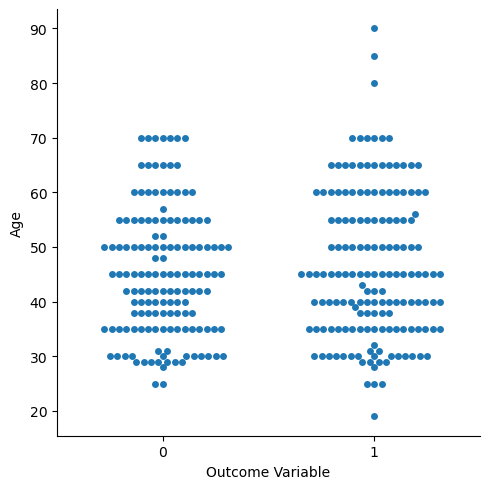

In [39]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## In Seaborn's catplot with kind='swarm', it is a way to generate a swarm plot for categorical data.
## The points are adjusted along the categorical axis, providing a clear view of the distribution while preventing overlap.
sns.catplot(x = 'Outcome Variable' , y = 'Age' , data = df , kind = "swarm") 

In [40]:
lr=LinearRegression()

### Multiple linear regresyon

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [42]:
x=df.iloc[:,:8]
y=df.iloc[:,:-1]

In [43]:
mlr=LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [44]:
print(mlr.intercept_,mlr.coef_)

[-1.05471187e-15  1.11022302e-15 -4.77395901e-15  7.21644966e-16
  2.13162821e-14 -6.66133815e-16  2.39808173e-14  1.66533454e-14
  5.93317045e-01] [[ 1.00000000e+00  2.52911378e-16  2.15333824e-16 -2.98797116e-16
   1.88916014e-17  1.87611423e-16 -2.39662095e-17 -1.04383439e-16]
 [ 1.14500468e-16  1.00000000e+00  6.40245864e-18 -6.44331645e-16
  -1.55686830e-17 -7.85851993e-17  2.30240250e-16 -3.56762798e-16]
 [ 3.95993965e-16  2.54851248e-16  1.00000000e+00 -4.24489093e-16
   9.94801588e-17 -4.98469193e-16  5.36091618e-16 -3.11651398e-16]
 [-1.47663365e-16 -9.92126845e-16 -1.06848928e-16  1.00000000e+00
   8.56460223e-18 -4.22565384e-16 -1.68984164e-16 -1.60043509e-16]
 [-1.37780093e-15  2.96975397e-15  1.89795065e-16  2.20854308e-15
   1.00000000e+00  4.20910564e-16 -1.96351151e-15  8.74710347e-16]
 [-1.36374908e-16  5.64775864e-17 -2.94399925e-16 -2.09210274e-16
   1.70191921e-17  1.00000000e+00  6.67715206e-17 -1.75908356e-16]
 [ 2.36369504e-16  2.20681163e-16 -6.84185442e-16 -9.3

## Polynominal linear regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures
plr=PolynomialFeatures(degree=3)

x_pol=plr.fit_transform(x)
lr_pol=LinearRegression()
lr_pol.fit(x_pol,y)

LinearRegression()

In [46]:
import sklearn
print(sklearn.__version__)

1.3.0


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error



x=df.iloc[:,:8]
y=df.iloc[:,:-1]

In [48]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

tree_pred=tree_reg.predict(x)
print("tree r2:",r2_score(y,tree_pred))

tree r2: 0.9944323192730836


In [49]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)
rf_pred=rf.predict(x)

print("rf r2:",r2_score(y,rf_pred))
print("rf mae:",mean_absolute_error(y,rf_pred))

rf r2: 0.9394094136866052
rf mae: 0.0848636890064668


In [50]:
lr=LinearRegression()

In [51]:
x=df.iloc[:,:8]
y=df.iloc[:,:-1]

In [52]:
lr.fit(x,y)

LinearRegression()

In [53]:
mlr=LinearRegression()
mlr.fit(x,y)
mlr_pred=mlr.predict(x)

dt=DecisionTreeRegressor()
dt.fit(x,y)
dt_pred=dt.predict(x)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)
rf_pred=rf.predict(x)

In [54]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr:","r2:",r2_score(y,mlr_pred),"mae:",mean_absolute_error(y,mlr_pred))
print("dt:","r2:",r2_score(y,dt_pred),"mae:",mean_absolute_error(y,dt_pred))
print("rf:","r2:",r2_score(y,rf_pred),"mae:",mean_absolute_error(y,rf_pred))

mlr: r2: 0.9135476282566979 mae: 0.043195674291452685
dt: r2: 0.9944323192730836 mae: 0.002777777777777778
rf: r2: 0.9394094136866052 mae: 0.0848636890064668


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr:","r2:",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred))
print("dt:","r2:",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred))
print("rf:","r2:",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))

mlr: r2: 0.9044365614245528 mae: 0.043221252890617526
dt: r2: 0.18200951144120991 mae: 0.2222222222222222
rf: r2: 0.5245980729177125 mae: 0.256241975308642


## Conclusion 

The Multiple Linear Regression model appears to be the best-performing model among the three, as it has the highest R-squared value and the lowest MAE.
The Decision Tree model has a lower R-squared value and a higher MAE, suggesting it may not capture the relationships as well as the other models.
The Random Forest model falls between the Multiple Linear Regression and Decision Tree in terms of performance, providing a balance between complexity and predictive accuracy.